# Dynophore notebook

## Introduction

### What is a dynophore?

* A **dynophore** is a collection of so-called superfeatures. 
* A **superfeature** is defined as a pharmacophore feature on the ligand side &mdash; defined by a feature type and one or more ligand atoms &mdash; that occurs at least once during an MD simulation. Example: HBA[4618] (feature type, ligand atom numbers)
* A superfeature has a **point cloud**, where each point corresponds to the centroid of feature during one frame of the trajectory.
* A superfeature can have one or more interaction partner(s) on the macromolecule side. These interaction partners are called **environmental partners**. Example: GLN-131-A[2057] (residue name, residue number, chain, atom serial numbers).

### How to work with a dynophore?

* **Dynophore raw data** can be analyzed conveniently right here in this notebook by working with the `Dynophore` class.
* **Dynophore 2D view** shows all superfeatures on a 2D view of the structure-bound ligand using `rdkit`.
* **Dynophore 3D view** maps each superfeature's point cloud in 3D using `nglview`, allowing for an easy visual inspection of the dynamic macromolecule-ligand interactions. Point clouds are rendered alongside the complex structure's topology and (optionally) the trajectory underlying the dynophore.
* **Dynophore statistics** cover the occurrence of superfeatures and their environmental partners as well as distances between them.

In [1]:
%load_ext autoreload
%autoreload 2

**Note**: When you work in Jupyter notebooks, use the `matplotlib` Jupyter magic to enable the `jupyter-matplotlib` backend which makes the plots interactive.

```
%matplotlib widget
```

We do not make use of the cell magic in this documentation notebook because it seems to conflict with rendering the plots on websites.

In [2]:
from pathlib import Path

import nglview as nv

# Import Dynophore class - contains all dynophore data
import dynophores as dyno

## Set data paths

In [3]:
DATA = Path("../../dynophores/tests/data")
dyno_path = DATA / "out"
pdb_path = DATA / "in/startframe.pdb"
dcd_path = DATA / "in/trajectory.dcd"

__Note__: You can set `dcd_path = None` in case you do not want to view the trajectory.

## Load data as `Dynophore` object

You can load the dynophore data as `Dynophore` object. We will need this object below for visualization purposes but you can also use the raw data for your own customized analyses.

__Note__: Check out [this tutorial](https://dynophores.readthedocs.io/en/latest/tutorials/explore_data.html) on the dynophore's data structure.

In [4]:
dynophore = dyno.Dynophore.from_dir(dyno_path)

## 2D view

Investigate the dynophore's superfeatures in 2D; display the atom serial numbers (those will show up in the superfeatures' identifiers in the plots below).

In [5]:
dyno.view2d.interactive.show(dynophore)

interactive(children=(Checkbox(value=False, description='Show superfeatures'), Checkbox(value=False, descripti…

## 3D view

Investigate the dynophore in 3D - you have different options that you can change in the method signature below:

* `pdb_path` and `dcd_path` have been defined at the beginning of this notebook; these are the file paths to your complex structure's topology and trajectory (if you do not want to load the trajectory, set `dcd_path=None`).
* `visualization_type`: `spheres` or `points`
  * [Default] Show each frames features as small spheres with `visualization_type=spheres`.
  * [Work-In-Progress] Render the dynophore cloud as more burred and connected points using `visualization_type=points` (still has some NGL rendering issues that we cannot fix on our end, see [NGL GitHub issue](https://github.com/nglviewer/ngl/issues/868))
* `color_cloud_by_frame`: `False` or `True`
  * [Default] Color cloud by superfeature type. Example: The points belonging to a HBA-based superfeature will all be colored red.
  * Color cloud by superfeature type *and* frame index. Example: The points belonging to a HBA-based superfeauture will be colored from red (first frame) to light red (last frame).
* `macromolecule_color`: Set a color for the macromolecule; defaults to blue.
* `frame_range`: Show a selected frame range only, e.g. `frame_range=[100, 1000]`. By default, all frames are shown with `frame_range=None`.

Interact directly with the 3D visualization using the NGL GUI:

* Toogle on/off macromolecule > *cartoon*
* Toogle on/off ligand > *hyperball*
* Toogle on/off pocket residue side chains > *licorice*
* Toogle on/off superfeatures > superfeature identifier e.g. *HBA[4618]*
* Run trajectory if loaded

In [6]:
view = dyno.view3d.show(
    dynophore,
    pdb_path=pdb_path,
    dcd_path=dcd_path,
    visualization_type="spheres",
    color_cloud_by_frame=False,
    macromolecule_color="#005780",
    frame_range=None,
)
view
# Uncomment the next line to enable the NGL GUI
#view.display(gui=True, style="ngl")

NGLWidget(max_frame=1001)

In [7]:
view.render_image(trim=True, factor=2, transparent=True);

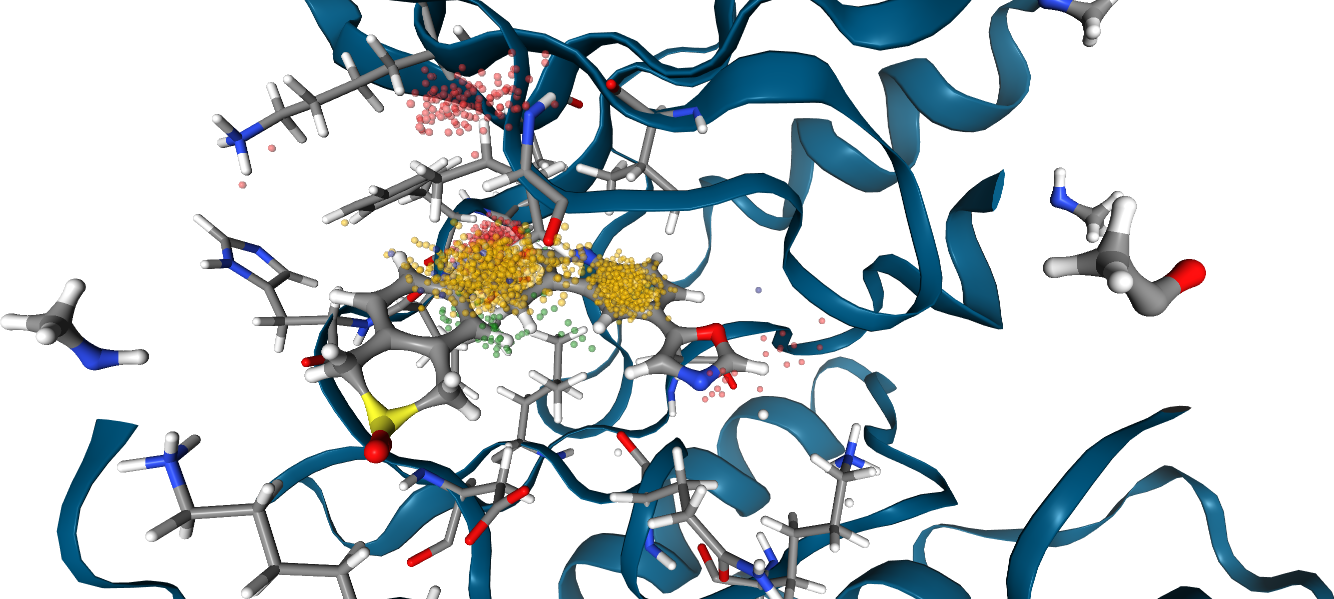

In [8]:
view._display_image()

In case a trajectory is loaded, use the `TrajectoryPlayer` for more visualization options:

In [9]:
#nv.player.TrajectoryPlayer(view)

## Statistics

### Plot interactions overview (heatmap)

Check how often each superfeature interacts with which environmental partners throughout the MD simulation (in %).

In [10]:
dyno.plot.interactive.superfeatures_vs_envpartners(dynophore)

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

### Plot superfeature occurrences (time series)

Check when (barcode) and how often (in %) a superfeature $S$ occurs throughout the MD simulation.

$S\,\text{occurrence [%]} = \frac{\text{Number of frames in which}\,S\,\text{occurs}}{\text{Number of frames}} \times 100$

In [11]:
dyno.plot.interactive.superfeatures_occurrences(dynophore)

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

### Plot interactions for example superfeature (time series)

#### Interaction occurrence

Check when (barcode) and how often (in %\) each environmental partner $E$ interacts in context of a superfeature $S$ ($E_S$).

$E_S\,\text{occurrence [%]} = \frac{\text{Number of frames where}\,E\,\text{interacts in context of}\,S}{\text{Number of frames where}\,S\,\text{occurs}} \times 100$

In [12]:
dyno.plot.interactive.envpartners_occurrences(dynophore)

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

#### Interaction distances

Check for each superfeature, the distances to all environmental partners throughout the MD simulation. 

* **Time series**: Distances are shown for all frames regardless of whether that frame shows an interaction between the environmental partner and the superfeature's ligand atoms or not. Interactions are indicated with a dot in the plot.
* **Histogram**: Only distances are shown that belong to frames in which an interaction between the environmental partner and the superfeature's ligand atoms ocurrs.

In [13]:
dyno.plot.interactive.envpartners_distances(dynophore)

interactive(children=(SelectMultiple(description='Superfeature ID(s)', index=(0,), layout=Layout(width='550px'…

#### Interaction profile (all-in-one)

This is a summary of the plots shown above. Note that in this case *all* distances throughout the MD simulation are shown (regardless of whether the frame shows an interaction or not).

In [14]:
dyno.plot.interactive.envpartners_all_in_one(dynophore)

interactive(children=(Select(description='Superfeature ID(s)', layout=Layout(width='550px'), options=('H[4599,…